### Практическая работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [19]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# -- ВАШ КОД ТУТ --

C:\Anaconda 3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :f

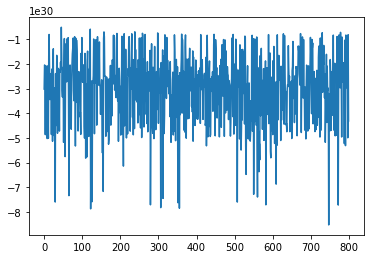

r2 =  -4.311575606518738e+30


In [37]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import random

sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.1, fit_intercept=True, random_state=42)
r2_evolution = []
weight_evolution = []
w_current = np.random.random(13)
epsilon = 0.1

for step in range(800):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1]<epsilon:
        print('Итерация закончена', step)
        break
    r2_evolution.append(r2_score(y_test, sgd_regressor.predict(X_test)))
    w_current = sgd_regressor.coef_.copy()
    
plt.plot(range(step+1), r2_evolution)
plt.show()
print('r2 = ', r2_evolution[step])

In [33]:
max(r2_evolution)

-4.0102666982007976e+27

In [24]:
r2_evolution.index(max(r2_evolution))

614

In [29]:
X_df = pd.DataFrame(X)
X_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [34]:
weight_evolution

[8656254132829.945,
 8965002662645.723,
 5407852355029.821,
 7236441092886.853,
 4595639722055.164,
 7084087034029.175,
 4464085104814.744,
 8892552882799.197,
 8481674833692.6,
 7061006336928.122,
 8611810395776.88,
 9382765782397.559,
 12852446748600.3,
 4409659735550.235,
 6848493949593.11,
 4909108677326.883,
 7404382555973.126,
 5749361356568.365,
 10550598815667.385,
 7536647717891.822,
 1365099150182.76,
 1364658021251.234,
 7850954455537.346,
 5325753309697.029,
 2731434840751.624,
 9552277329066.312,
 8670607113511.42,
 7943167741073.292,
 6102767194732.872,
 6136722947444.893,
 5954567922686.869,
 3238461708721.7773,
 4898099331585.239,
 6556974075976.389,
 6454013748445.637,
 11467202401969.566,
 1894723488922.838,
 7706362345791.9,
 14268380122916.975,
 13126737479237.39,
 7289855052228.596,
 9188756423183.992,
 5637256671772.879,
 5283145563080.522,
 7835500760159.432,
 2809984643172.0303,
 6407648914041.18,
 8804334941959.85,
 7369344661872.053,
 4307200004926.312,
 52651